# Creating Spectograms

Create spectograms of the provided songs to feed into the AI model.

In [1]:
import os
import sys
import cv2
import pyprojroot
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display

# Make it to where paths only need to be from the repo folder.
root = pyprojroot.find_root(pyprojroot.has_dir(".git"))
sys.path.append(str(root))


audio_fpath = os.path.join(root, "data/DEAM_audio/MEMD_audio")
list_of_audio = os.listdir(audio_fpath)

if os.path.exists(os.path.join(audio_fpath, list_of_audio[1340])): print("Exists")
else: print("Not found")

Exists


Play the audio through notebook:

In [2]:
current = os.path.join(audio_fpath, list_of_audio[1])
#current = "C:/Users/tyler/Music/Final Fantasy XVI/Disc 1/1.19 Away.mp3"
IPython.display.Audio(current)

Load the song and visualize its shape and type:

In [3]:
x, sr = librosa.load(current, sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(1987190,) 44100


Create and display spectogram:

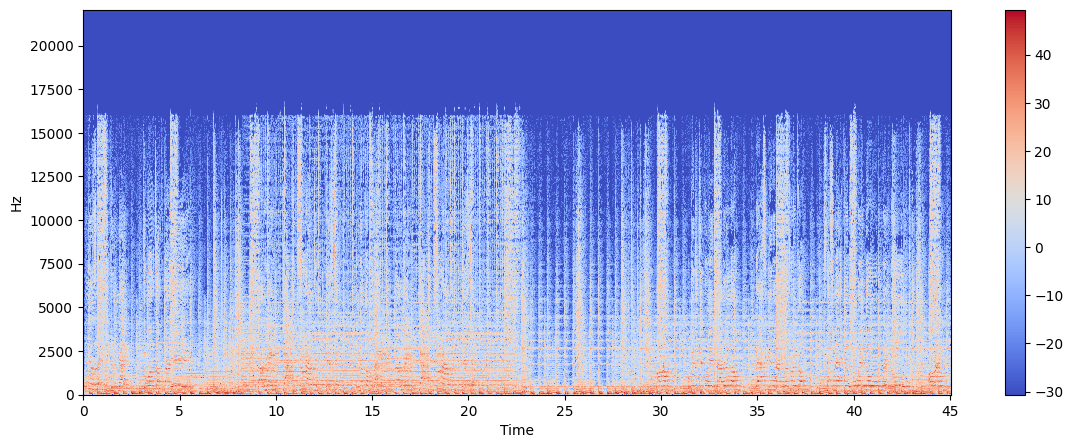

In [4]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();

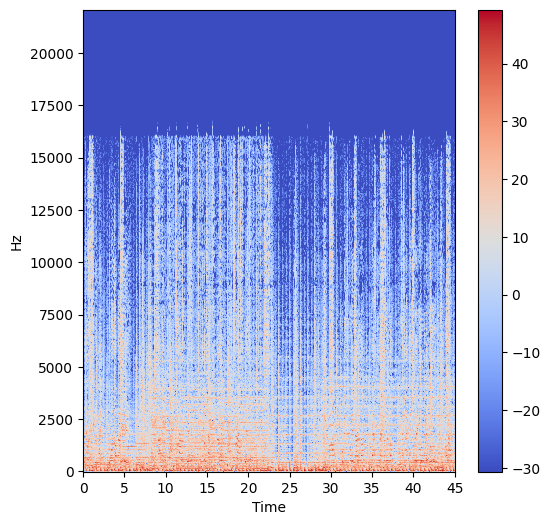

In [5]:
plt.figure(figsize=(6, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();

Save the spectogram as an image:

In [9]:
cv2.imwrite("spectogram.png", Xdb)

True